In [1]:
import keras
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

seed = 0
tf.config.experimental.enable_op_determinism()
tf.random.set_seed(seed)
keras.utils.set_random_seed(seed)
init_weight = keras.initializers.glorot_uniform(seed=seed)

(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


**각 class별 첫번째 이미지 시각화**

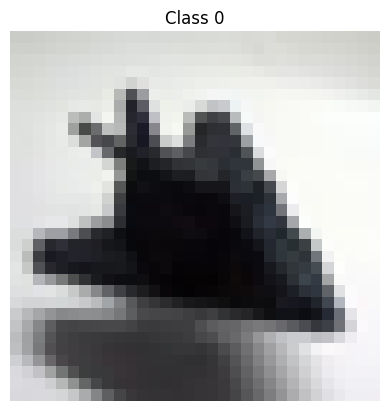

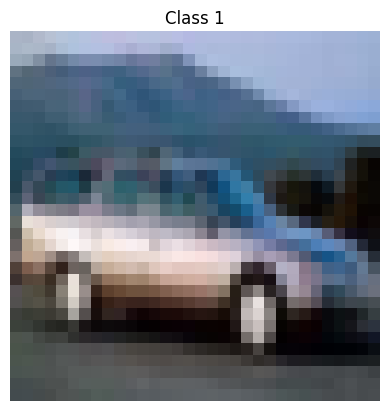

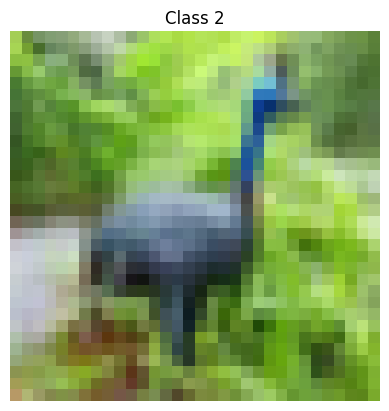

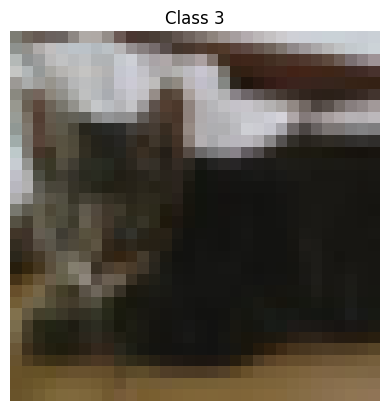

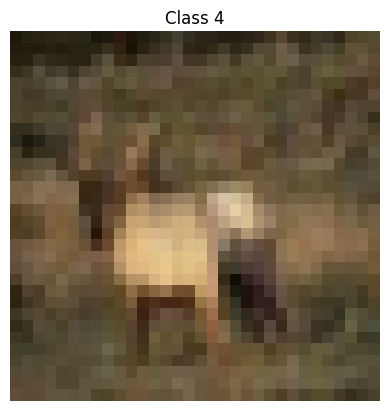

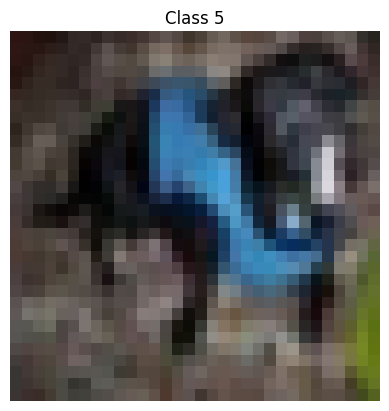

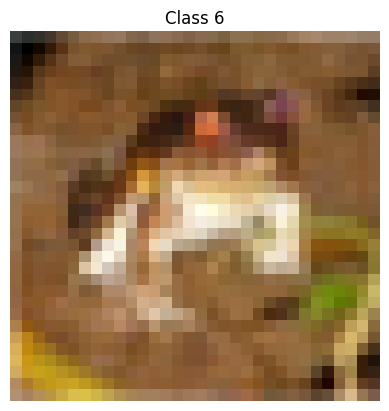

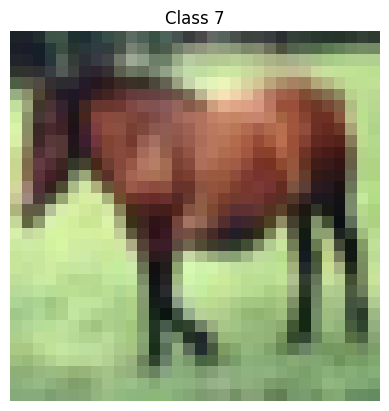

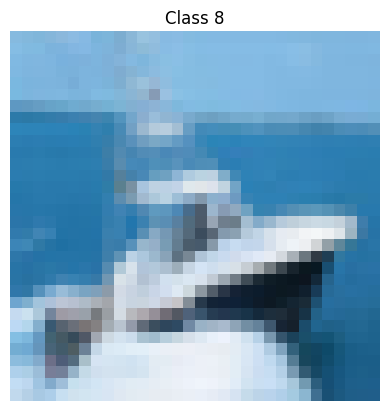

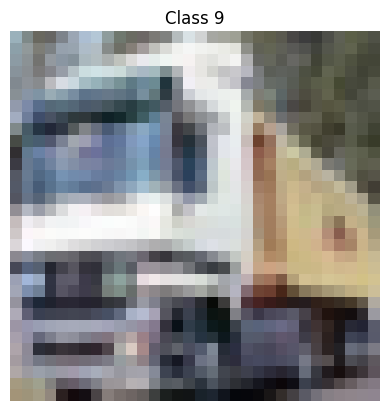

In [3]:
# class별 첫번째 이미지를 저장할 배열
class_images = [None] * 10

for image, label in zip(train_images, train_labels):
    if class_images[label] is None:  # 해당 클래스에 이미지가 저장되지 않았다면
        class_images[label] = image  # 이미지를 저장

    if all(img is not None for img in class_images):
        break

for cls, img in enumerate(class_images):
    plt.imshow(img)
    plt.title(f"Class {cls}")
    plt.axis('off')
    plt.show()

**CNN모델 생성**

In [50]:
init_weight = keras.initializers.glorot_uniform(seed=seed)

model = keras.models.Sequential([
    keras.layers.Conv2D(input_shape=(32, 32, 3),
                        filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=128,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),

    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=256,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=512,
                        kernel_size=(3, 3),
                        activation='relu',
                        kernel_initializer=init_weight,
                        padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu', kernel_initializer=init_weight),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(256, activation='relu', kernel_initializer=init_weight),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', kernel_initializer=init_weight),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=init_weight),
])

model.compile(optimizer="Nadam",
              loss = 'sparse_categorical_crossentropy', # 고정
              metrics=['accuracy'])

**CNN모델 학습 및 평가**

In [51]:
history = model.fit(train_images, train_labels,
                    epochs=10, # 고정
                    validation_data=(test_images, test_labels),
                    batch_size=256) # 고정

test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=256)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - accuracy: 0.3083 - loss: 2.0742 - val_accuracy: 0.1001 - val_loss: 4.5538
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.5907 - loss: 1.1499 - val_accuracy: 0.2047 - val_loss: 2.8593
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.6991 - loss: 0.8625 - val_accuracy: 0.6123 - val_loss: 1.1729
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.7582 - loss: 0.7023 - val_accuracy: 0.7467 - val_loss: 0.7467
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.7960 - loss: 0.5998 - val_accuracy: 0.7789 - val_loss: 0.6993
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.8236 - loss: 0.5181 - val_accuracy: 0.7934 - val_loss: 0.6558
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.8467 - loss: 0.4543 - val_accuracy: 0.8123 - val_loss: 0.5856
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8669 - loss: 0.3955 -